<a href="https://colab.research.google.com/github/JFrankVC/deepL-intro/blob/main/ch4_class_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary classification example

## 1. The IMDB dataset

### Loading the IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [2]:
len(train_data[0])

218

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

### Decoding reviews back to text

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 1s 0us/step


In [6]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [7]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [8]:
len(decoded_review.split())

218

## 2. Preparing the data

### Encoding the integer sequences via multi-hot encoding

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        # print(i)
        for j in sequence:
            results[i, j] = 1.  # Sets specific indices of results[i] to 1s
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [12]:
type(train_labels[0])

numpy.int64

In [13]:
y_train[0]

1.0

## 3. Building your model

The input data is vectors, and the labels are scalars (1s and 0s): this is one of the simplest problem setups you'll ever encounter. A type of model that performs well on such a problem is a plain stack of densely connected
`(Dense)` layers with `relu` activations.

There are two key architecture decisions to be made about such a stack of `Dense` layers:

*   How many layers to use
*   How many units to choose for each layer

### Model definition

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),    # 16 units
    layers.Dense(16, activation="relu"),    # 16 units
    layers.Dense(1, activation="sigmoid")   # 1 unit
])

Each such `Dense` layer with a `relu` activation implements the following chain of tensor operation: `output = relu(dot(input, W) + b)`.

Having 16 units means the weight matrix `W` will have shape `(input_dimension, 16)`: the dot product with `W` will project the input data onto a 16-dimensional representation space (and then you'll add the bias vector `b` and apply the `relu` operation).

Dimensionality: *“how much freedom you're allowing the model to have when learning internal representations.”*

### Compiling the model

In [20]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Setting aside a validation set

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training your model

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 101ms/step - loss: 0.5184 - accuracy: 0.7922 - val_loss: 0.4120 - val_accuracy: 0.8414
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3239 - accuracy: 0.8948 - val_loss: 0.3310 - val_accuracy: 0.8720
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2455 - accuracy: 0.9209 - val_loss: 0.2838 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1997 - accuracy: 0.9319 - val_loss: 0.3041 - val_accuracy: 0.8766
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1688 - accuracy: 0.9458 - val_loss: 0.2811 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1468 - accuracy: 0.9526 - val_loss: 0.2829 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1267 - accuracy: 0.9597 - val_loss: 0.2949 - val_accuracy: 0.8857
Epoch 8/20
3

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting the training and validation loss

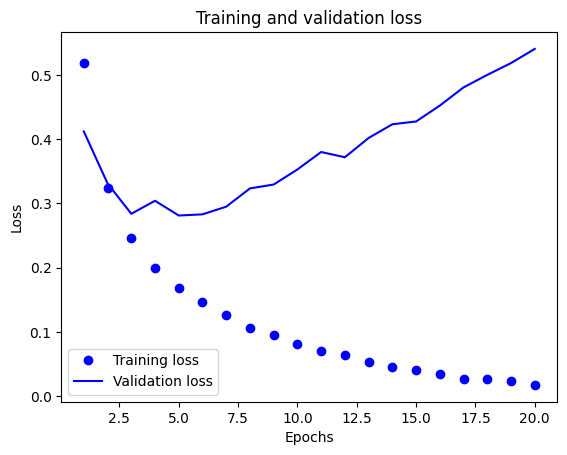

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]      # Training loss
val_loss_values = history_dict["val_loss"]      # Validation loss
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [30]:
print(len(loss_values))
print(len(val_loss_values))
print(len(epochs))
print(loss_values)
print(val_loss_values)
print(list(epochs))

20
20
20
[0.5183507204055786, 0.3239496946334839, 0.24546562135219574, 0.1996936798095703, 0.1687966287136078, 0.14679133892059326, 0.12670256197452545, 0.10656974464654922, 0.0943642258644104, 0.08083326369524002, 0.07016024738550186, 0.06456392258405685, 0.05228660628199577, 0.04452509060502052, 0.04096570238471031, 0.03378221392631531, 0.026964813470840454, 0.025868313387036324, 0.023673031479120255, 0.017352910712361336]
[0.41201430559158325, 0.3309849500656128, 0.2838231325149536, 0.304080069065094, 0.2811155319213867, 0.28294363617897034, 0.29490208625793457, 0.3233247697353363, 0.32936426997184753, 0.3528441786766052, 0.3800179064273834, 0.3718162477016449, 0.4018351435661316, 0.4231959879398346, 0.42753541469573975, 0.4522773027420044, 0.4806167483329773, 0.5000865459442139, 0.5184694528579712, 0.5405157804489136]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


### Plotting the training and validation accuracy

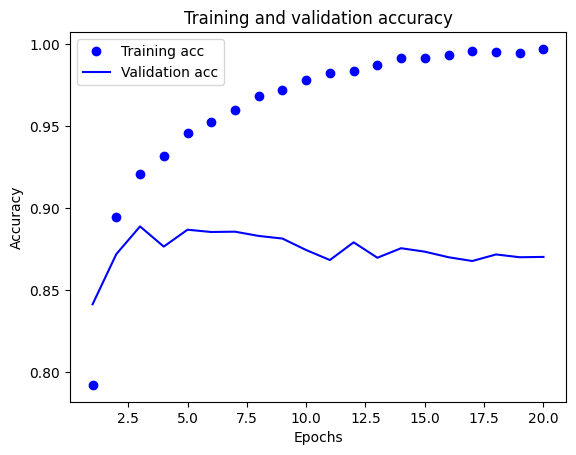

In [25]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
print(len(acc))
print(len(val_acc))
print(len(epochs))
print(acc)
print(val_acc)
print(list(epochs))

20
20
20
[0.7922000288963318, 0.8948000073432922, 0.9209333062171936, 0.9318666458129883, 0.9458000063896179, 0.9526000022888184, 0.9596666693687439, 0.9684666395187378, 0.9723333120346069, 0.9782666563987732, 0.9824000000953674, 0.9838666915893555, 0.9874666929244995, 0.9915333390235901, 0.9916666746139526, 0.9935333132743835, 0.9961333274841309, 0.995199978351593, 0.9949333071708679, 0.9972000122070312]
[0.8414000272750854, 0.871999979019165, 0.8888999819755554, 0.8766000270843506, 0.886900007724762, 0.8855000138282776, 0.885699987411499, 0.8830999732017517, 0.8815000057220459, 0.8744999766349792, 0.868399977684021, 0.8791999816894531, 0.8697999715805054, 0.8755999803543091, 0.8734999895095825, 0.8701000213623047, 0.8677999973297119, 0.8718000054359436, 0.8701000213623047, 0.8702999949455261]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


#### Plotting both accuracy and loss

Text(0, 0.5, 'Loss/Accuracy')

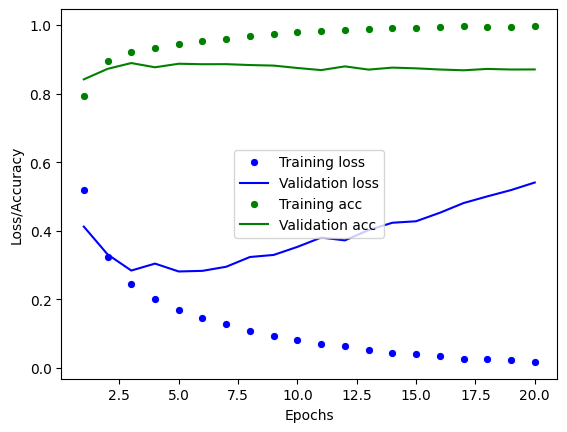

In [41]:
import seaborn as sns
sns.lineplot(x=epochs, y=loss_values, linestyle="", label="Training loss", marker='o', color="blue")
sns.lineplot(x=epochs, y=val_loss_values, linestyle="-", label="Validation loss", color="blue")
sns.lineplot(x=epochs, y=acc, linestyle="", label="Training acc", marker='o', color="green")
sns.lineplot(x=epochs, y=val_acc, linestyle="-", label="Validation acc", color="green")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")

Text(0.5, 1.0, 'Loss vs Accuracy')

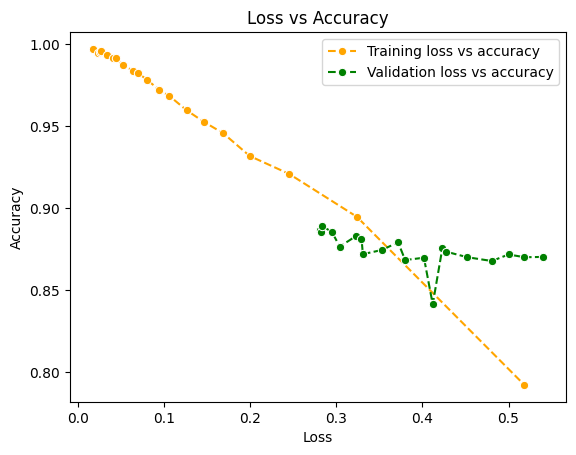

In [49]:
sns.lineplot(x=loss_values, y=acc, linestyle="--", label="Training loss vs accuracy", marker='o', color="orange")
sns.lineplot(x=val_loss_values, y=val_acc, linestyle="--", label="Validation loss vs accuracy", marker='o', color="green")
plt.xlabel("Loss")
plt.ylabel("Accuracy")
plt.title("Loss vs Accuracy")